In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('dataset/train.csv')

In [4]:
test = pd.read_csv('dataset/test.csv')

In [65]:
# Data contains numerical values, except for "galaxy" and 
# "galactic year", which represent name and ordinal relationship
print(data.dtypes.values)
print(test.dtypes.values)

[dtype('int64') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('

In [47]:
#Are there any new unknown galaxies in the test dataset?
#The answer is NO
a = set(data['galaxy'].unique())
b = set(test['galaxy'].unique())
b.issubset(a)

True

In [49]:
#Test dataset contains objects only of latest 10 years, including unmentioned in train data year 1016064
unique_years = data['galactic year'].unique()
print (unique_years)
print (unique_years.shape)

print(np.sort(test['galactic year'].unique()))
print(test['galactic year'].unique().shape)

[ 990025  991020  992016  993012  994009  995006  996004  997002  998001
  999000 1000000 1001000 1002001 1003002 1004004 1005006 1006009 1007012
 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056]
(26,)
[1007012 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056
 1016064]
(10,)


galactic year
990025     0.081928
991020     0.082005
992016     0.082007
993012     0.082011
994009     0.082023
995006     0.082027
996004     0.082088
997002     0.082100
998001     0.082106
999000     0.082111
1000000    0.082117
1001000    0.082297
1002001    0.082297
1003002    0.082300
1004004    0.082291
1005006    0.082288
1006009    0.082435
1007012    0.081335
1008016    0.081379
1009020    0.081381
1010025    0.081331
1011030    0.080062
1012036    0.094917
1013042    0.098005
1014049    0.087332
1015056    0.080857
Name: y, dtype: float64


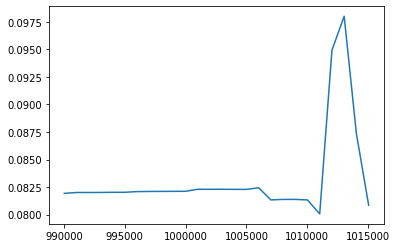

In [41]:
y_dist = data.groupby(['galactic year'])['y'].mean()
print (y_dist)
plt.plot(y_dist)

galaxy
Andromeda Galaxy (M31)                  0.043539
Andromeda I                             0.049126
Andromeda II                            0.176689
Andromeda III                           0.117387
Andromeda IX                            0.166813
                                          ...   
Ursa Major II Dwarf                     0.190628
Ursa Minor Dwarf                        0.051538
Virgo I                                 0.042337
Willman 1                               0.055283
Wolf-Lundmark-Melotte (WLM, DDO 221)    0.044738
Name: y, Length: 181, dtype: float64


(array([125.,  21.,   8.,  10.,   8.,   6.,   0.,   2.,   0.,   1.]),
 array([0.03693184, 0.07251439, 0.10809694, 0.14367949, 0.17926205,
        0.2148446 , 0.25042715, 0.2860097 , 0.32159225, 0.3571748 ,
        0.39275736]),
 <a list of 10 Patch objects>)

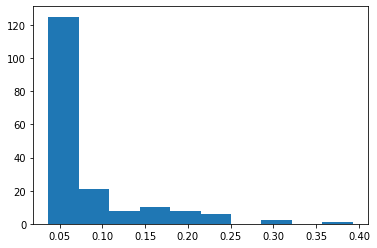

In [42]:
y_dist = data.groupby(['galaxy'])['y'].mean()
print(y_dist)
plt.hist(y_dist)

In [56]:
data.iloc[:, -1].describe()

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

In [58]:
(unique_years - 990025)/1001

array([ 0.        ,  0.99400599,  1.98901099,  2.98401598,  3.98001998,
        4.97602398,  5.97302697,  6.97002997,  7.96803197,  8.96603397,
        9.96503497, 10.96403596, 11.96403596, 12.96403596, 13.96503497,
       14.96603397, 15.96803197, 16.97002997, 17.97302697, 18.97602398,
       19.98001998, 20.98401598, 21.98901099, 22.99400599, 24.        ,
       25.00599401])